In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import loadmat
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Check

In [2]:
ori_annots = loadmat('D:\\GoogleDrive\\retina\\Troy\'s data\\20211126\\LED_output\\diode_OSR_200-50ms_10mW_27-Nov-2021_0', squeeze_me = True)
annots = loadmat('D:\\GoogleDrive\\retina\\Troy\'s data\\20211126\\SplitData\\diode_OSR_200-50ms_10mW_27-Nov-2021_0', squeeze_me = True)
sampling_rate = 20000
TicTocer = annots['a_data'][1]
startPoint = np.where(TicTocer>38000)[0][0]
endPoint = np.where(TicTocer[startPoint+sampling_rate*150:]>38000)[0][0]+startPoint+sampling_rate*150-1
# endPoint = np.where(TicTocer>38000)[0][-1]


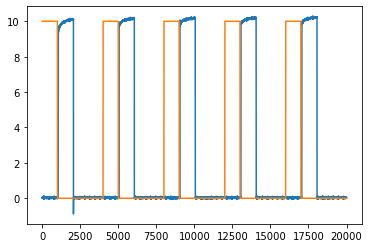

In [6]:
offset = sampling_rate*180

x = annots['a_data'][0, offset+startPoint-1:offset+startPoint+20000]
x = x.astype(float)
plt.plot((x-36200)/(4000-3620))
plt.plot(ori_annots['ey'][offset+20000:offset+20000+20000])
# plt.plot(ori_annots['callumin'][-1850+offset+20000:-1850+offset+20000+20000])
# plt.plot(annots['a_data'][1, startPoint-1:startPoint+20000])

In [3]:
plt.plot(ori_annots['ey'][offset+20000:offset+20000+20000])

NameError: name 'offset' is not defined

4905335

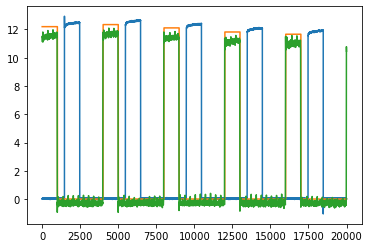

In [71]:
offset = sampling_rate*250

x = annots['a_data'][0, offset+startPoint-1:offset+startPoint+20000]
x = x.astype(float)
plt.plot((x-36200)/(4000-3620))
plt.plot(ori_annots['ey'][offset+20000:offset+20000+20000])
plt.plot(ori_annots['callumin'][-1850+offset+20000:-1850+offset+20000+20000])
# plt.plot(annots['a_data'][1, startPoint-1:startPoint+20000])

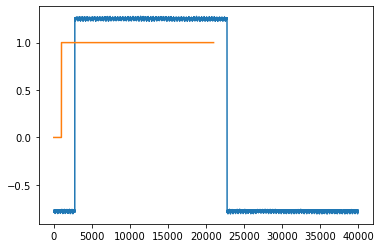

In [59]:
# ori_annots = loadmat('\\\\ZebraNas\\Public\\Retina\\WF_stimuli\\211125\\AM_LPOU_1s1Hz_200-50ms_10-2mW', squeeze_me = True)
# annots = loadmat('D:\\GoogleDrive\\retina\\Troy\'s data\\20211126\\SplitData\\diode_AM_LPOU_1s1Hz_200-50ms_10-2mW_27-Nov-2021_0', squeeze_me = True)

offset = sampling_rate*300

TicTocer = annots['a_data'][1, offset+startPoint-1:offset+startPoint+40000]
TicTocer = TicTocer.astype(float)
plt.plot((TicTocer-36000)/(40000-36000))
plt.plot(ori_annots['a2'][offset+20000:offset+20000+40000])

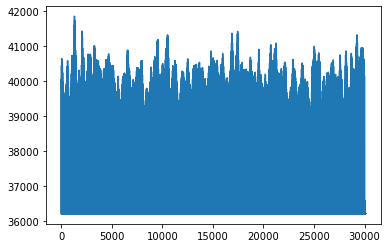

In [6]:
plt.plot(x)

(4000.0, 4100.0)

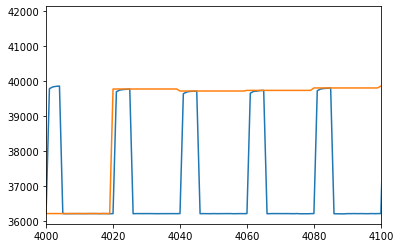

In [7]:
xDownSample = x[5::20]

plt.plot(x)
plt.plot(np.repeat(xDownSample,20))

plt.xlim(4000,4100)

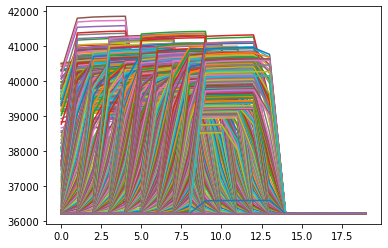

In [8]:
for i in range(int(len(x)/20)):
    plt.plot(x[i*20:(i+1)*20])

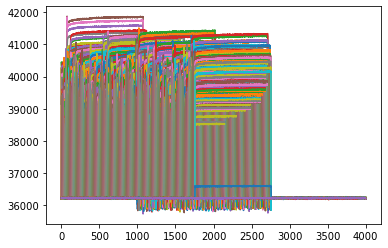

In [9]:
x = annots['a_data'][0, startPoint:endPoint+1]

for i in range(int(len(x)/4000)):
    plt.plot(x[i*4000:(i+1)*4000])

In [34]:
x = annots['a_data'][0, startPoint:endPoint+1]
x = x.astype(float)
np.where(np.diff(x)<-1000)[0]
np.arange(1000,6E6,4000)

ValueError: operands could not be broadcast together with shapes (1772,) (1500,) 

# OSR

In [98]:
dt = 0.01; 
meanIPI = 0.2; 
pulseLen = 0.05; 
repeat = 25;
rest = 5; 
Trial = 20;

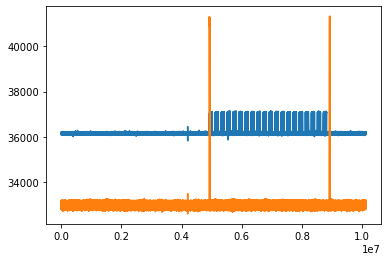

In [99]:
# annots = loadmat('D:\\GoogleDrive\\retina\\Troy\'s data\\20211126\\SplitData\\diode_OSR_200-50ms_10mW_27-Nov-2021_0', squeeze_me = True)
annots = loadmat('D:\\GoogleDrive\\retina\\Exps\\2021\\1130\\SplitData\\diode_OSR_200-50ms_10mW_30-Nov-2021_0', squeeze_me = True)
sampling_rate = 20000
plt.plot(annots['a_data'][0])
plt.plot(annots['a_data'][1])

In [100]:
# annots = loadmat('D:\\GoogleDrive\\retina\\Exps\\2021\\1130\\LED_output\\diode_AM_LPOU_1s1Hz_200-50ms_10-2mW_30-Nov-2021_0', squeeze_me = True)
# sampling_rate = 20000
# plt.plot(annots['ey'])
# plt.plot(annots['callumin'])

# plt.xlim(1E6,1.1E6)

In [101]:
theta = 37000
startPoints = np.zeros(Trial+2, dtype=int)
for i in range(Trial):
    startPoints[i+1] = np.where(annots['a_data'][0,startPoints[i]+sampling_rate*7:]>theta)[0][0]+startPoints[i]+sampling_rate*7
startPoints[-1] = np.where(annots['a_data'][1,startPoints[-2]+sampling_rate*7:]>theta)[0][0]+startPoints[-2]+sampling_rate*7
startPoints = startPoints[1:]

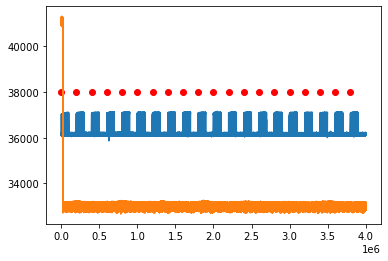

In [102]:
plt.plot(annots['a_data'][0,startPoints[0]:startPoints[-1]])
plt.plot(annots['a_data'][1,startPoints[0]:startPoints[-1]])
plt.scatter(startPoints[:-1]-startPoints[0], np.ones(Trial)*38000, c = 'r')

In [103]:
channelnumber = 44
Spike = annots['Spikes'][channelnumber-1]
Spike_Trial = []
for i in range(Trial):
    Spike_Trial.append(Spike[np.where(Spike>startPoints[i]/sampling_rate)[0][0]:np.where(Spike<(startPoints[i+1])/sampling_rate)[0][-1]]-startPoints[i]/sampling_rate)
x = annots['a_data'][0,startPoints[0]:startPoints[1]][int(sampling_rate*dt*0.5)::int(sampling_rate*dt)]
x = (x-np.min(x))/(np.max(x)-np.min(x))*10+20
tAxis = np.arange(len(x))*dt+0.5*dt

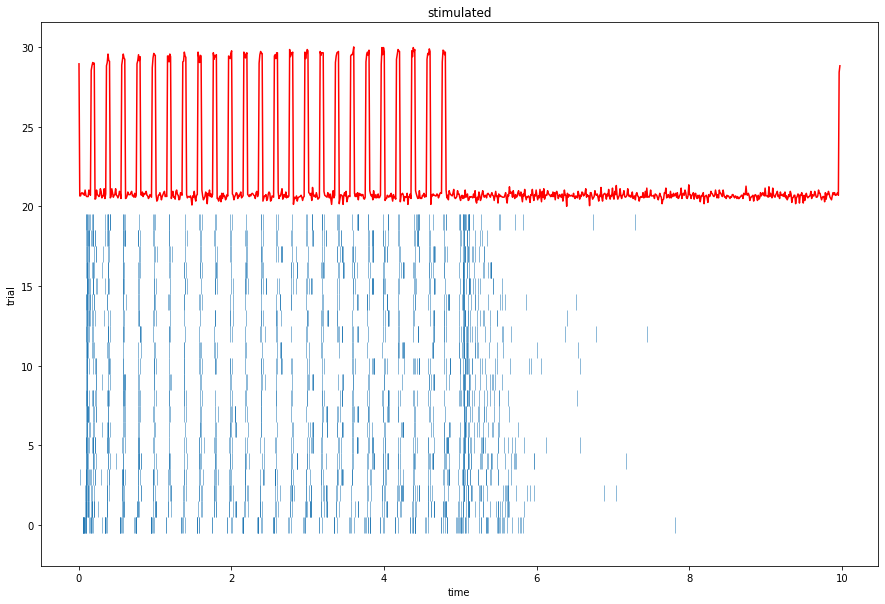

In [104]:
fig, ax = plt.subplots()
ax.plot(tAxis, x, 'r')
ax.eventplot(Spike_Trial, linewidths=0.5)
ax.set_title('stimulated')
ax.set_xlabel('time')
ax.set_ylabel('trial')
# ax.set_xlim(4,6)
fig.set_size_inches(15, 10)

In [105]:
long_tAxis = np.arange(0,max(np.diff(startPoints))/sampling_rate+dt,dt)
rstate_accum = np.zeros(len(long_tAxis)-1)
for Spike in Spike_Trial:
    rstate_accum += np.histogram(Spike, long_tAxis)[0]

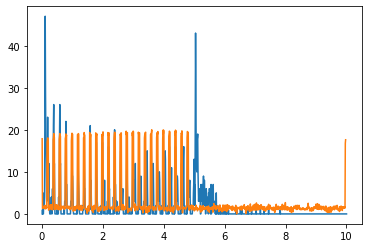

In [106]:
plt.plot(long_tAxis[:-1]+0.5*dt, rstate_accum)
plt.plot(tAxis, (x-20)*2)

# OSR+jitter

In [107]:
dt = 0.01; 
meanIPI = 0.2; 
pulseLen = 0.05; 
repeat = 25;
rest = 5; 
Trial = 20;

In [108]:
annots = loadmat('D:\\GoogleDrive\\retina\\Troy\'s data\\20211126\\SplitData\\diode_OSR_jitter_200-50ms_10mW_27-Nov-2021_0', squeeze_me = True)
annots = loadmat('D:\\GoogleDrive\\retina\\Exps\\2021\\1130\\SplitData\\diode_OSR_jitter_200-50ms_10mW_30-Nov-2021_0', squeeze_me = True)
sampling_rate = 20000

In [109]:
theta = 37000
startPoints = np.zeros(Trial+2, dtype=int)
for i in range(Trial):
    startPoints[i+1] = np.where(annots['a_data'][0,startPoints[i]+sampling_rate*7:]>theta)[0][0]+startPoints[i]+sampling_rate*7
startPoints[-1] = np.where(annots['a_data'][1,startPoints[-2]+sampling_rate*7:]>theta)[0][0]+startPoints[-2]+sampling_rate*7
startPoints = startPoints[1:]

In [110]:
Spike = annots['Spikes'][channelnumber-1]
Spike_Trial2 = Spike_Trial.copy()
Spike_Trial = []
for i in range(Trial):
    Spike_Trial.append(Spike[np.where(Spike>startPoints[i]/sampling_rate)[0][0]:np.where(Spike<(startPoints[i+1])/sampling_rate)[0][-1]]-startPoints[i]/sampling_rate)
    Spike_Trial2.append(Spike[np.where(Spike>startPoints[i]/sampling_rate)[0][0]:np.where(Spike<(startPoints[i+1])/sampling_rate)[0][-1]]-startPoints[i]/sampling_rate)
x = annots['a_data'][0,startPoints[0]:startPoints[1]][int(sampling_rate*dt*0.5)::int(sampling_rate*dt)]
x = (x-np.min(x))/(np.max(x)-np.min(x))
tAxis = np.arange(len(x))*dt+0.5*dt

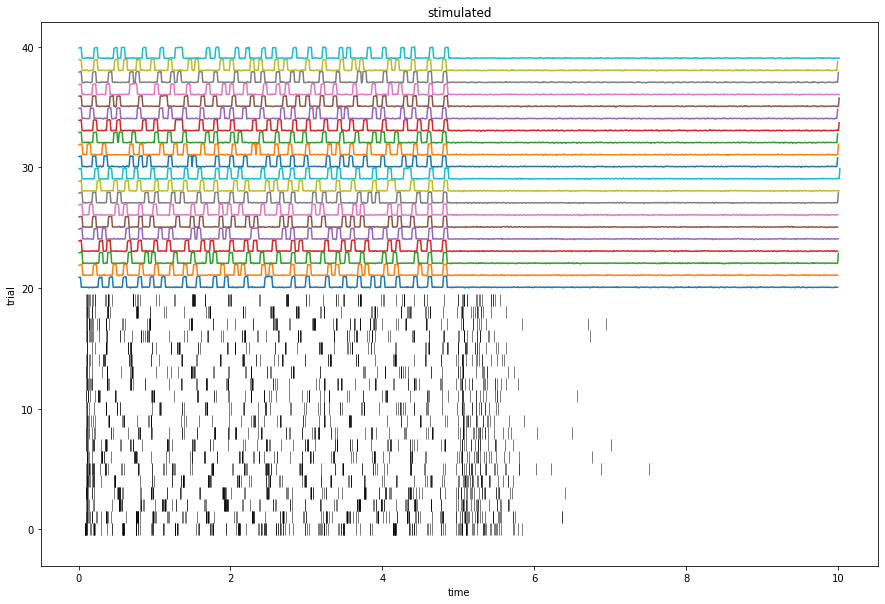

In [111]:
fig, ax = plt.subplots()
for i in range(Trial):
    x = annots['a_data'][0,startPoints[i]:startPoints[i+1]][int(sampling_rate*dt*0.5)::int(sampling_rate*dt)]
    x = (x-np.min(x))/(np.max(x)-np.min(x))+Trial+i
    tAxis = np.arange(len(x))*dt+0.5*dt
    ax.plot(tAxis, x)
ax.eventplot(Spike_Trial, color= 'k',linewidths=0.5)
ax.set_title('stimulated')
ax.set_xlabel('time')
ax.set_ylabel('trial')
# ax.set_xlim(4,6)
fig.set_size_inches(15, 10)

In [112]:
long_tAxis = np.arange(0,max(np.diff(startPoints))/sampling_rate+dt,dt)
rstate_accum = np.zeros(len(long_tAxis)-1)
for Spike in Spike_Trial:
    rstate_accum += np.histogram(Spike, long_tAxis)[0]

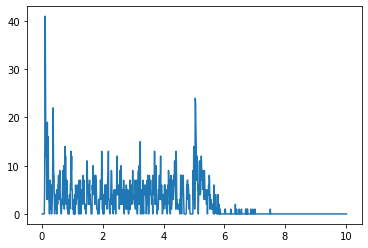

In [113]:
plt.plot(long_tAxis[:-1]+0.5*dt, rstate_accum)

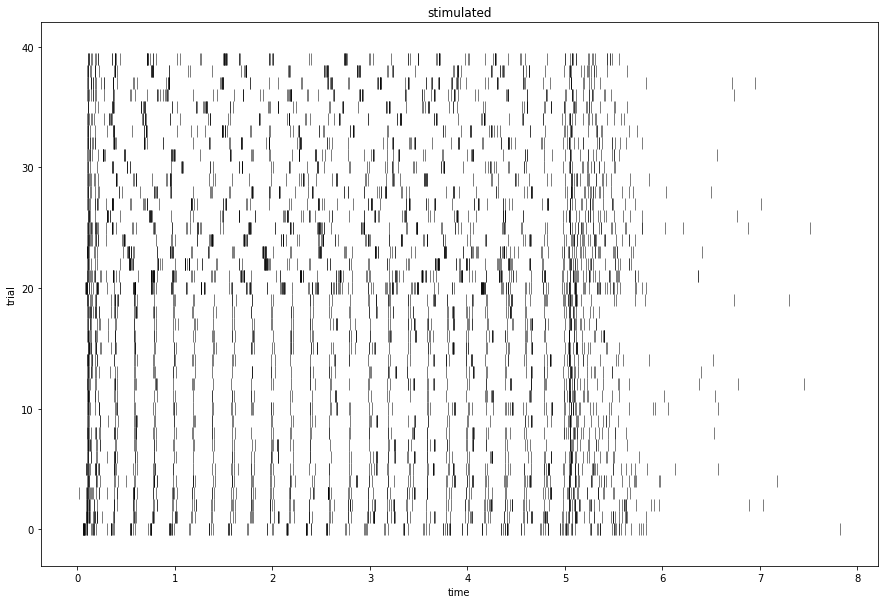

In [114]:
fig, ax = plt.subplots()
ax.eventplot(Spike_Trial2, color= 'k',linewidths=0.5)
ax.set_title('stimulated')
ax.set_xlabel('time')
ax.set_ylabel('trial')
# ax.set_xlim(4,6)
fig.set_size_inches(15, 10)